This tutorial was created by Bruno Abreu. It is intellectual property of the University of Illinois. The content is entirely based on Qiskit's documentation and training materials (see references in each section).

The topic of this notebook is **Quantum Circuits**. Some of the sections contain exercises.

### Environment setup

`qiskit` is straightforward to install using `pip`. For more information, please visit their documentation: https://qiskit.org/documentation/getting_started.html

In [2]:
!pip install qiskit[visualization]

In [3]:
import qiskit.tools.jupyter

%qiskit_version_table

### Imports

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap
from qiskit.quantum_info import Statevector

# Quantum circuits

## Building quantum circuits

`qiskit` is a platform for quantum programming using the circuit-based model. The programmer defines *qubits*, the quantum counterparts of bits, and applies gate operations on them to achieve a desired outcome. We will use the `QuantumCircuit` class: https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html

By default, qubits are initialized in the $\lvert 0 \rangle$ state. Typically, each qubit is associated with a classical bit register, which is used to store the outcome of a measure.

In [2]:
qc = QuantumCircuit(3,3) # defines a quantum circuit with 3 quantum registers and 3 classical registers (to store measurements)

It is possible to visualize the circuit using the `draw()` method:

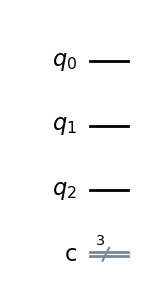

In [3]:
qc.draw('mpl')

## Applying quantum gates

Gates are operations that can be applied on single or multiple qubits. Typically, these operations create superposition and entanglement between quantum states, and are expressed through unitary transformations. A list of possible gates is available here: https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#


Below, we apply a few gates to the the three-qubit circuit `qc` defined on the previous section by calling the associated gate method on the `QuantumCircuit` instance.

In [4]:
qc.h(0) # apply a Hadamard gate on qubit 0
qc.cx(2,1) # apply a CNOT gate with control and target qubits 2 and 1, respectively
qc.ry(0.785, 0) # apply a 45 degrees rotation around the Y-axis for qubit 0
qc.ccx(0,1,2) # apply a Toffoli gate on all three-qubits, with the last one being the target
qc.x(0) # apply a Pauli X gate on qubit 0
qc.y(1) # apply a Pauli Y gate on qubit 1
qc.z(2) # apply a Pauli Z gate in qubit 2

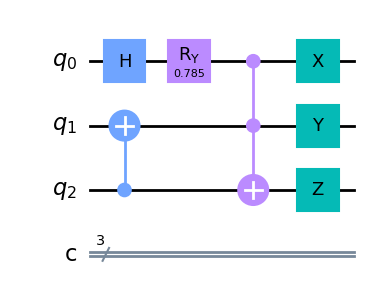

In [5]:
qc.draw('mpl')

## Measuring outcomes

After superposition and entaglement are created and the desired operations are performed, we are interested in measuring the state of one or multiple qubits, and assigning the outcome to the corresponding *classical* bit. With `qiskit`, measurements are always on the $Z$-basis ($\lvert 0 \rangle$ and $\lvert 1 \rangle$, the eigenstates of the Pauli Z matrix).

We can assign the outcome of each measurement to a specific classical register using the `measure()` method of the `QuantumCircuit` instance.

In [6]:
qc.measure([0,1,2], [0,1,2]) # measure qubits 0, 1, and 2, and assign outcome to classical bits 0, 1, and 2

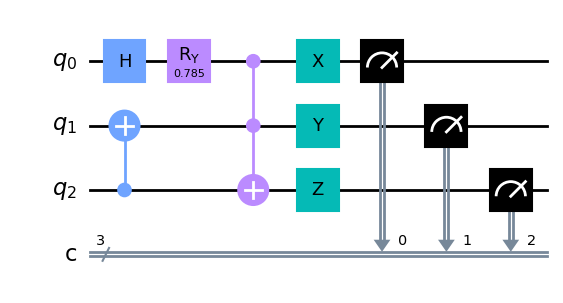

In [7]:
qc.draw('mpl')

Alternatively, one we want to measure all the qubits in the circuit, we can use the `measure_all()` method. This method will create an additional set of classical registers where the measure is stored each time it is called.

In [8]:
qc.measure_all()

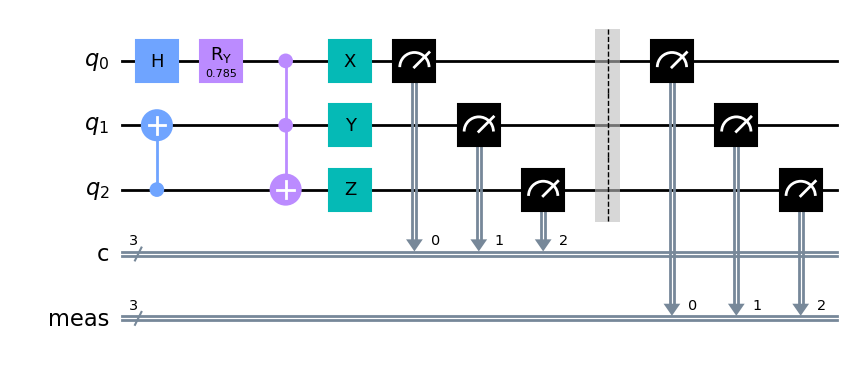

In [9]:
qc.draw('mpl')

Notice that, so far, each time we call a method on the `QuantumCircuit` instance, the instance itself is modified. In other others, operations are *inplace*.

### Exercise

In the cells below:

- a) Create a circuit with $N > 3$ qubits and a certain number of accompanying classical bits
- b) Using the implement `qiskit` gates, apply at least one single-qubit gate to each qubit, and at least one two-qubit gate and one three-qubit gate over the circuit. As you apply the gates, use the `draw()` method to verify your operations
- c) Measure one or more qubits and store them in the classical registers
- d) Visualize your final circuit

In [10]:
# a) create quantum circuit

In [11]:
# b) apply gates

In [12]:
# c) measure outcomes

In [13]:
# d) visualize final circuit

## Circuit library

In designing quantum applications from bottom up using the circuit-based model, patterns emerge, and certain circuit slices often appear. Some of these common circuits are implemented in the `qiskit.circuit.library`: https://qiskit.org/documentation/apidoc/circuit_library.html

For instance, in the context of Quantum Machine Learning, the second-order Pauli-Z evolution circuit (`ZZFeatureMap`) can be used to encode classical data into quantum states: https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZZFeatureMap.html#qiskit.circuit.library.ZZFeatureMap

In [14]:
qc_zz = ZZFeatureMap(3, reps=1)  # circuit to encode a dataset with 3 features

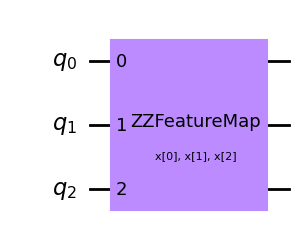

In [15]:
qc_zz.draw('mpl')

In these cases, since this is such a common operation, the entire set of gates is enclosed in the same box as if it was a single gate operation. We can zoom into that box using the `decompose()` method. You may have to use this method several times until arriving at individual, non-composed gates.

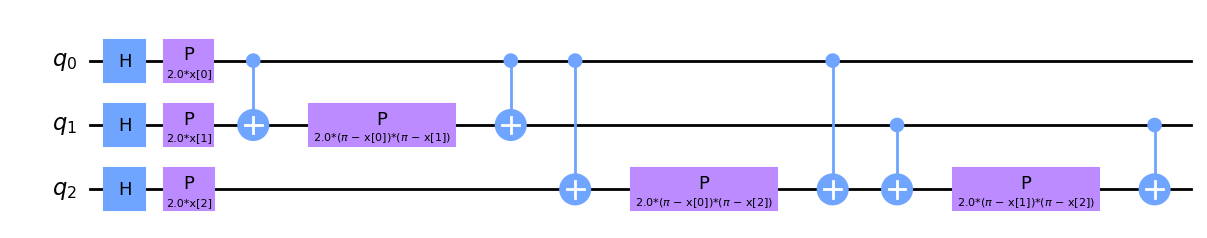

In [16]:
qc_zz.decompose().draw('mpl')

### Exercise

- a) Explore the `qiskit.circuit.library` and choose another circuit
- b) Import the chosen circuit class and create an instance
- c) Visualize the circuit, decomposing it as many times as necessary

In [17]:
# b) import the pre-built circuit class, create an instance

In [18]:
# c) visualize the circuit

## Visualizing quantum states

In the context of unitary gate operations and in the absence of mid-circuit measurements, it is possible to calculate the quantum state of the qubits. However, some of the methods below will not be useful when there is entanglement, as in such case it is impossible to factorize the multi-qubit quantum state.

Performing the product of each gate and applying it to the initial state of the qubits can be done with the `Statevector` class: https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html

### Bloch sphere

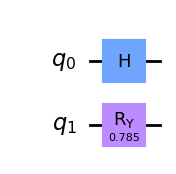

In [19]:
qc_simple = QuantumCircuit(2)
qc_simple.h(0) # create a superposition on qubit 0
qc_simple.ry(0.785, 1) # rotate qubit 1 around the y-axis
qc_simple.draw('mpl')

In [20]:
ket_simple = Statevector(qc_simple) # calculate the vector state associated to this circuit

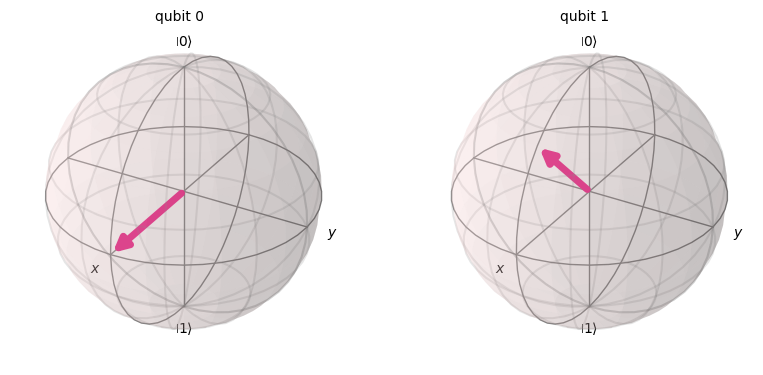

In [21]:
ket_simple.draw('bloch') # plot the states on Bloch spheres

### Q-sphere

https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html

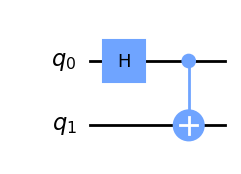

In [22]:
qc_ent = QuantumCircuit(2) # circuit with two qubits
qc_ent.h(0) # superposition in the first qubit
qc_ent.cx(0,1) # CNOT with the first and second, creating a Bell state
qc_ent.draw('mpl')

In [23]:
ket = Statevector(qc_ent)

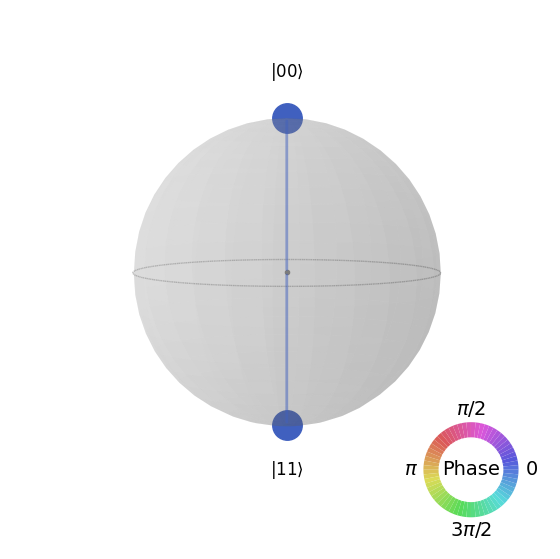

In [24]:
ket.draw('qsphere') # draw the Qsphere representation

### Latex

In [25]:
ket.draw('latex') # print the latex quantum state

<IPython.core.display.Latex object>

### Exercise

- a) Create a simple circuit
- b) Try to calculate the quantum state associated to that gate sequence
- c) Calculate and visualize the state using the `StateVector` class and check against b)

In [26]:
# a) create circuit

In [27]:
# c) calculate state using StateVector